In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
data1 = pd.read_excel("CW_Data.xlsx")
display(data1)


,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


In [30]:
#分离特征

In [102]:
from sklearn.model_selection import train_test_split
# 2. 选择特征
features = ['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
X = data1[features]  # 特征

# 3. 分割数据集为训练集和测试集（不需要分割成X和y）
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Best number of components according to AIC: 7
Best number of components according to BIC: 7


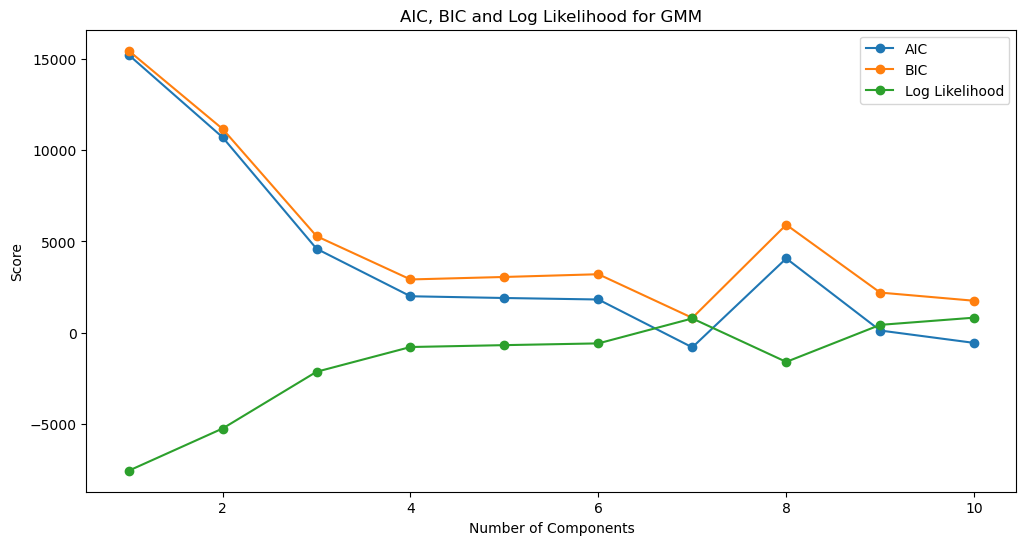

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 假设已经定义和分割了 X_train
# 定义高斯混合模型的成分数量范围
n_components_range = range(1, 11)
aic_scores = []
bic_scores = []
log_likelihoods = []

# 计算每个成分数量的 AIC, BIC 和对数似然
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train)
    aic_scores.append(gmm.aic(X_train))
    bic_scores.append(gmm.bic(X_train))
    log_likelihoods.append(gmm.score(X_train) * X_train.shape[0])  # 计算总对数似然

# 找到 AIC 和 BIC 最小值对应的成分数量
best_n_components_aic = n_components_range[np.argmin(aic_scores)]
best_n_components_bic = n_components_range[np.argmin(bic_scores)]

print(f'Best number of components according to AIC: {best_n_components_aic}')
print(f'Best number of components according to BIC: {best_n_components_bic}')

# 绘制 AIC, BIC 和对数似然的折线图
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, log_likelihoods, label='Log Likelihood', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC, BIC and Log Likelihood for GMM')
plt.legend()
plt.show()


In [110]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 使用高斯混合模型对训练数据进行聚类
gmm = GaussianMixture(n_components=7, covariance_type='diag',random_state=42)
gmm.fit(X_train)

# 预测训练集样本的后验概率
train_posterior_probs = gmm.predict_proba(X_train)

# 预测测试集样本的后验概率
test_posterior_probs = gmm.predict_proba(X_test)

# 预测训练集的簇标签
y_train_pred = np.argmax(train_posterior_probs, axis=1)

# 预测测试集的簇标签
y_test_pred = np.argmax(test_posterior_probs, axis=1)

# 打印评估结果
sil_score = silhouette_score(X_train, y_train_pred)#轮廓系数
calinski_harabasz = calinski_harabasz_score(X_train, y_train_pred)#Calinski-Harabasz指数
davies_bouldin = davies_bouldin_score(X_train, y_train_pred)#Davies-Bouldin指数
print(f'Silhouette Score: {sil_score:.2f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')

# 投票方式关联聚类簇与项目
cluster_programme_mapping = {}
for cluster_label in set(y_train_pred):
    cluster_indices = (y_train_pred == cluster_label)
    cluster_programme = y_train[cluster_indices].mode().values[0]
    cluster_programme_mapping[cluster_label] = cluster_programme

# 在测试集上进行投票
y_test_pred_associated = np.array([cluster_programme_mapping[cluster_label] for cluster_label in y_test_pred])

# 计算准确率
accuracy = accuracy_score(y_test, y_test_pred_associated)
print(f'Accuracy: {accuracy:.2f}')


Silhouette Score: -0.29
Calinski-Harabasz Score: 76.07
Davies-Bouldin Score: 4.37
Accuracy: 0.60


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


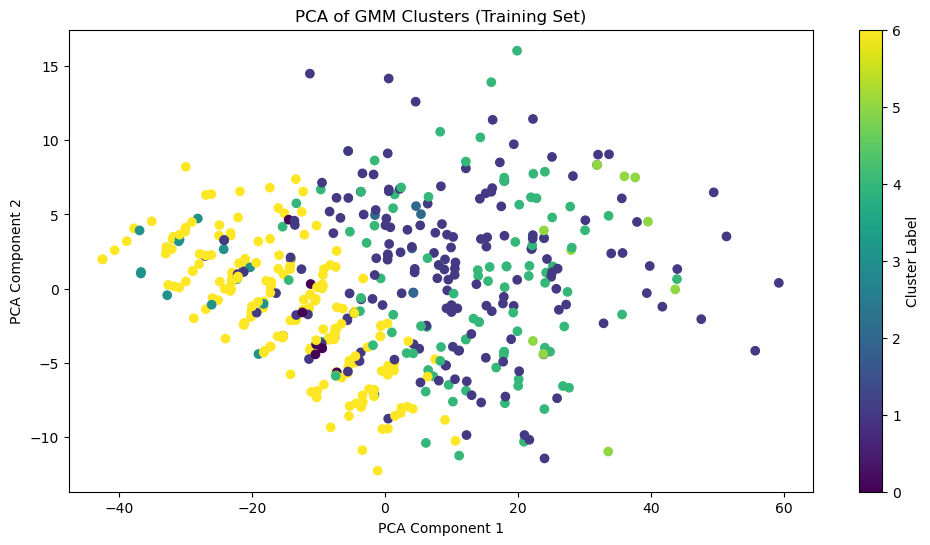

In [111]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 使用PCA将数据降维到2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# 绘制PCA降维后的数据和聚类结果
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of GMM Clusters (Training Set)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


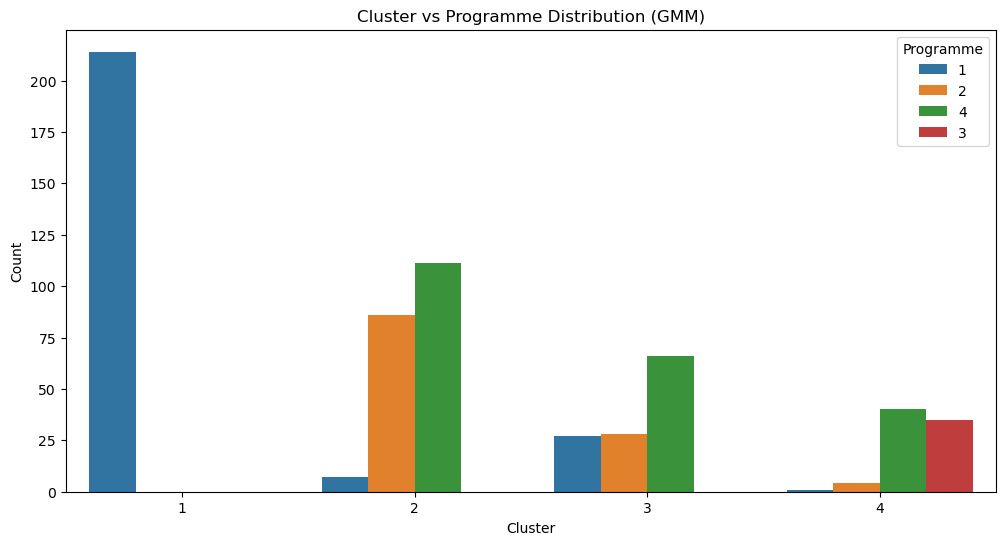

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 执行高斯混合模型
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(features_scaled)

# 获取每个样本在每个混合成分上的后验概率
posterior_probs = gmm.predict_proba(features_scaled)

# 获取每个样本在具有最高后验概率的混合成分上的索引
max_posterior_idx = np.argmax(posterior_probs, axis=1)

# 将最高后验概率的混合成分索引作为虚拟簇标签
clusters = max_posterior_idx + 1  # 因为索引从0开始，所以加1以避免0作为簇标签

# 将聚类标签与程序标签进行关联
cluster_programme_df = pd.DataFrame({'Cluster': clusters, 'Programme': data['Programme']})

# 将Programme列转换为字符串类型
cluster_programme_df['Programme'] = cluster_programme_df['Programme'].astype(str)

# 计算每个聚类中每个程序的数量
cluster_programme_count = cluster_programme_df.groupby(['Cluster', 'Programme']).size().reset_index(name='Count')

# 可视化每个聚类中各程序的数量分布
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Count', hue='Programme', data=cluster_programme_count)
plt.title('Cluster vs Programme Distribution (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Programme')
plt.show()


In [35]:
#K-means

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# 1. 导入数据
data = pd.read_excel("CW_Data.xlsx")

# 2. 选择特征
features = data[['Gender', 'Grade', 'Total','Programme', 'MCQ', 'Q1', 'Q2','Q3', 'Q4', 'Q5']]

# 3. 数据预处理
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. 构建 K-means 模型
kmeans = KMeans(n_clusters=5, init='random', algorithm='elkan', n_init=10, max_iter=300, tol=1e-4, random_state=42)  # 设置簇的数量为4，根据需要调整
kmeans.fit(features_scaled)
cluster_labels_train = kmeans.labels_

# 5. 计算聚类质量指标（基于原始特征空间）
silhouette = silhouette_score(features_scaled, cluster_labels_train)
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels_train)
davies_bouldin = davies_bouldin_score(features_scaled, cluster_labels_train)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)



Silhouette Score: 0.19212413699657754
Calinski-Harabasz Score: 141.83891850587906
Davies-Bouldin Score: 1.6387303515164588


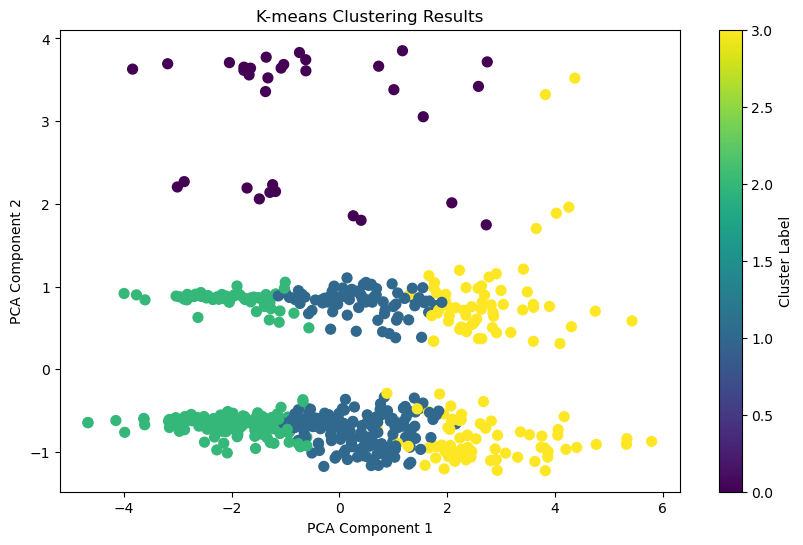

In [41]:
# 6. 可视化聚类结果（使用 PCA 降维）
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# 7. 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels_train, cmap='viridis', s=50)
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score: 0.1935299196543165
Calinski-Harabasz Score: 166.97235906734605
Davies-Bouldin Score: 1.5447732148777038
Accuracy: 0.60
Confusion Matrix:
[[155   0   0  94]
 [ 20   0   0  98]
 [  0   0  32   3]
 [ 32   0   1 184]]


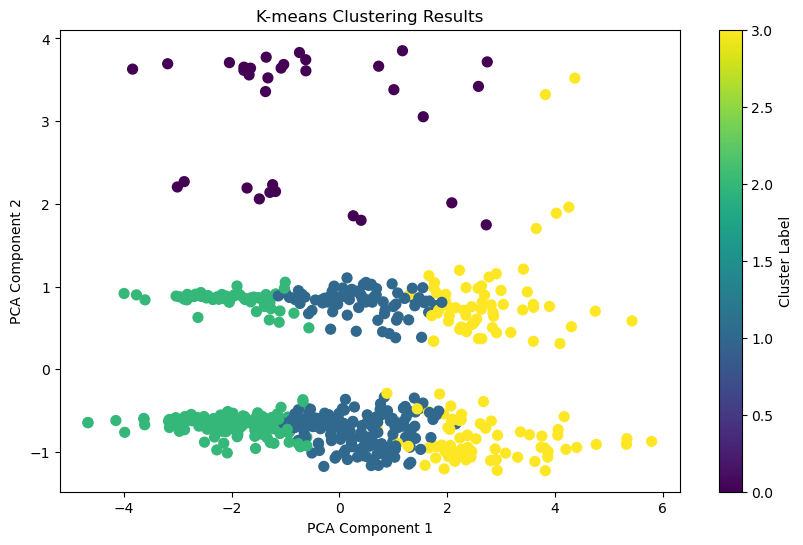

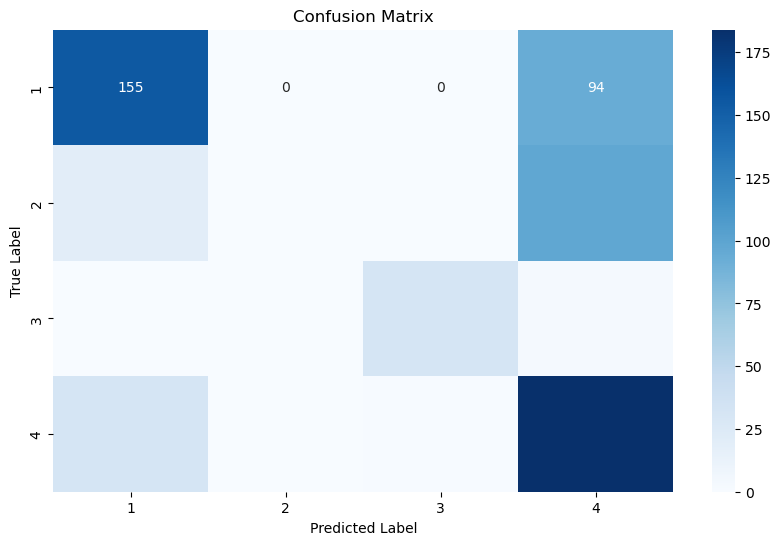

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# 1. 导入数据
data = pd.read_excel("CW_Data.xlsx")

# 2. 选择特征
features = data[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2','Q3', 'Q4', 'Q5']]

# 3. 数据预处理
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. 构建 K-means 模型
kmeans = KMeans(n_clusters=4, random_state=42)  # 设置簇的数量为4，根据需要调整
kmeans.fit(features_scaled)
cluster_labels_train = kmeans.labels_

# 5. 计算聚类质量指标（基于原始特征空间）
silhouette = silhouette_score(features_scaled, cluster_labels_train)
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels_train)
davies_bouldin = davies_bouldin_score(features_scaled, cluster_labels_train)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

# 8. 将聚类标签映射回实际的项目标签
cluster_to_programme = {}
for cluster in range(kmeans.n_clusters):
    mask = (cluster_labels_train == cluster)
    most_common_programme = data['Programme'].iloc[mask].mode()[0]
    cluster_to_programme[cluster] = most_common_programme

# 9. 使用样本与聚类中心的距离对测试集进行分类
distances = kmeans.transform(features_scaled)
y_test_pred = np.argmin(distances, axis=1)

# 10. 将测试集的聚类标签映射回实际的项目标签
y_test_pred_associated = np.array([cluster_to_programme[label] for label in y_test_pred])

# 11. 计算分类准确率
accuracy = accuracy_score(data['Programme'], y_test_pred_associated)
print(f'Accuracy: {accuracy:.2f}')

# 12. 生成混淆矩阵
conf_matrix = confusion_matrix(data['Programme'], y_test_pred_associated)
print("Confusion Matrix:")
print(conf_matrix)

# 13. 使用PCA将数据降维到2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# 14. 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels_train, cmap='viridis', s=50)
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 15. 可视化混淆矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(data['Programme']), yticklabels=np.unique(data['Programme']))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


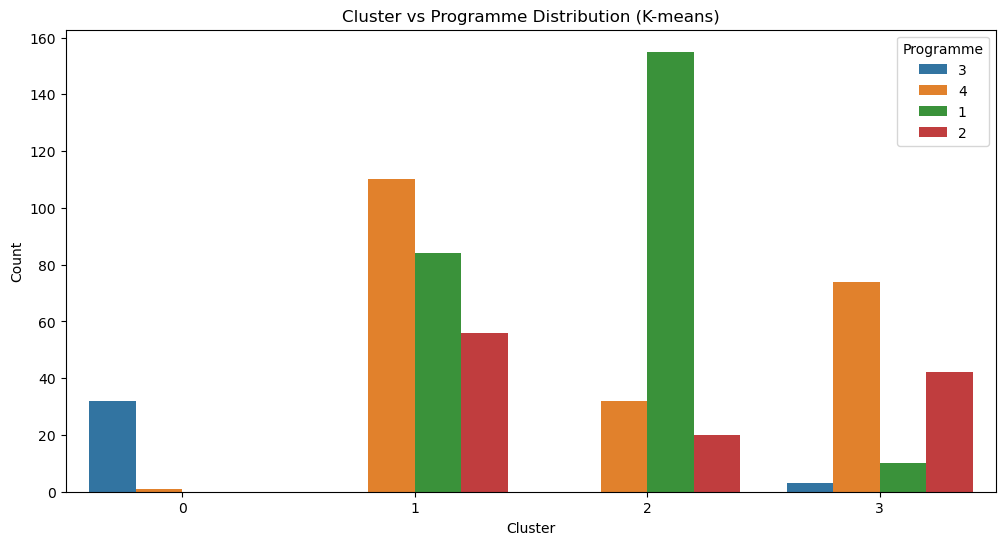

In [116]:
# 获取每个样本在具有最高后验概率的簇上的索引
clusters = kmeans.predict(features_scaled)

# 将聚类标签与程序标签进行关联
cluster_programme_df = pd.DataFrame({'Cluster': clusters, 'Programme': data['Programme']})

# 将Programme列转换为字符串类型
cluster_programme_df['Programme'] = cluster_programme_df['Programme'].astype(str)

# 计算每个聚类中每个程序的数量
cluster_programme_count = cluster_programme_df.groupby(['Cluster', 'Programme']).size().reset_index(name='Count')

# 可视化每个聚类中各程序的数量分布
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Count', hue='Programme', data=cluster_programme_count)
plt.title('Cluster vs Programme Distribution (K-means)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Programme')
plt.show()


In [ ]:
#层次聚类

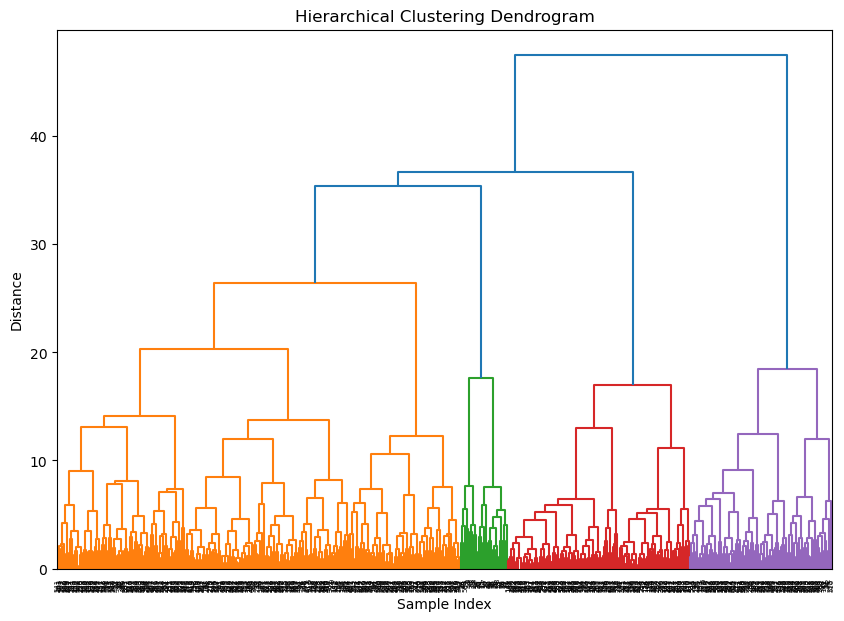

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 4. 执行层次聚类
linked = linkage(features_scaled, method='ward', metric='euclidean')

# 5. 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 6. 基于给定的阈值来获取聚类标签
# 需要选择一个合适的阈值以确保至少有两个簇
threshold = 200  # 调整这个阈值以获得合适的簇数量
clusters = fcluster(linked, threshold, criterion='distance')


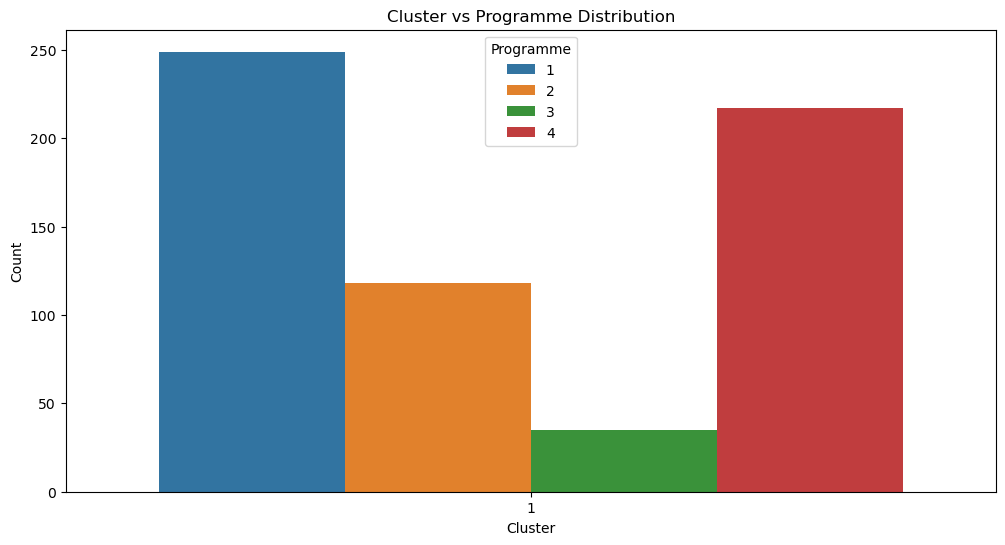

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# 基于给定的阈值获取聚类标签
threshold = 300
clusters = fcluster(linked, threshold, criterion='distance')

# 将聚类标签与程序标签进行关联
cluster_programme_df = pd.DataFrame({'Cluster': clusters, 'Programme': data['Programme']})

# 将Programme列转换为字符串类型
cluster_programme_df['Programme'] = cluster_programme_df['Programme'].astype(str)

# 计算每个聚类中每个程序的数量
cluster_programme_count = cluster_programme_df.groupby(['Cluster', 'Programme']).size().reset_index(name='Count')

# 可视化每个聚类中各程序的数量分布
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Count', hue='Programme', data=cluster_programme_count)
plt.title('Cluster vs Programme Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Programme')
plt.show()
